# Cats VS Dogs Notebook
In this notebook we will try classifing pictures of dogs/cats from the dataset Dogs vs. Cats (https://www.kaggle.com/c/dogs-vs-cats).  
Using neural-networks is forbidden.

In [1]:
#libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Data Importing

In [2]:
#example picture
exm=cv2.imread("Datasets/DvC/cat.0.jpg")#loading image
exm = cv2.cvtColor(exm, cv2.COLOR_BGR2RGB)#converting from BGR to RGB

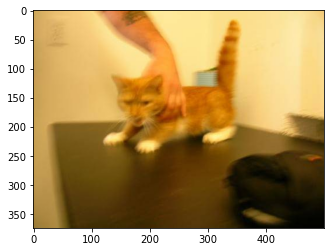

In [3]:
plt.imshow(exm)

In [4]:
exm.shape

(374, 500, 3)

We want to work with same-size images, we will reshape all images to the same scale.

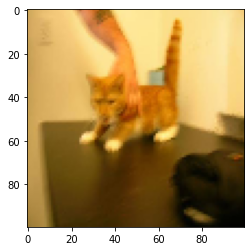

In [5]:
#first option- 100*100 colored
col_exm=cv2.resize(exm,(100,100))
plt.imshow(col_exm)

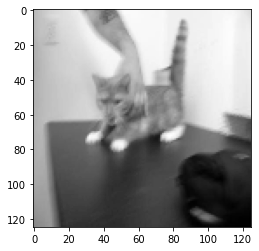

In [6]:
#second option- 125*125 grayscale
bnw_exm=cv2.cvtColor(exm, cv2.COLOR_RGB2GRAY)#grayscale image
bnw_exm=cv2.resize(bnw_exm,(125,125))
plt.imshow(bnw_exm,cmap='gray')

In [7]:
bnw_exm.shape

(125, 125)

The RGB dimentions were replaced with a single gray dimention

In [8]:
bnw_exm

array([[167, 173, 174, ..., 210, 206, 204],
       [167, 173, 174, ..., 211, 207, 205],
       [167, 173, 174, ..., 212, 208, 206],
       ...,
       [126, 128, 129, ...,   3,   3,   2],
       [125, 127, 129, ...,   3,   3,   3],
       [123, 124, 128, ...,   2,   2,   2]], dtype=uint8)

We can see that in both cases, even thogh the image is originally blurred we can still recognize the cat.  
Let's hope the computer will be able too.

We will work both on colored and grayscaled data and decide at the end what performs better and use this method for scoring.

In [9]:
#Loading data
from os import listdir
bnw_X, col_X = list(), list()
for file in listdir('Datasets/DvC/'):
    # load image
    im = cv2.imread("Datasets/DvC/"+file)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#to RGB
    #add to color
    col_X.append(cv2.resize(im,(100,100)))
    #add to black and white
    bnw_im=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)#grayscale image
    bnw_X.append(cv2.resize(bnw_im,(125,125)))
    

The first 12500 images are cats and the last 12500 are dogs.  

In [27]:
#create labels
labels=np.zeros(15000)
y=np.concatenate((labels,np.ones(15000)))
y

array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
y.shape

(30000,)

Text(0.5, 1.0, 'label is 0.0')

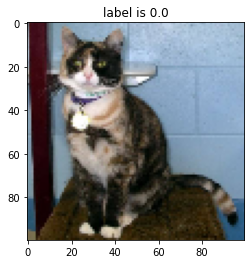

In [34]:
plt.imshow(col_X[12499])
plt.title('label is '+str(y[12499]))

Text(0.5, 1.0, 'label is 0.0')

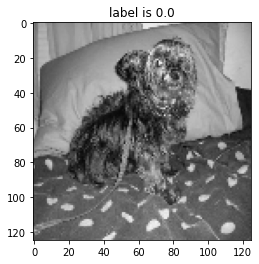

In [35]:
plt.imshow(bnw_X[12500],cmap='gray')
plt.title('label is '+str(y[12500]))